In [23]:
"""
# Sentiment Analysis with NLTK on Twitter Data

## Introduction
In this project, we will perform sentiment analysis on a Twitter dataset using the Natural Language Toolkit (NLTK) package in Python. NLTK is an open-source library for natural language processing that provides modules for collecting, handling, and processing Twitter data.

## Installation
To install NLTK, use the following command:
python -m pip install nltk

## Dataset
The dataset provided by NLTK contains 5000 positive tweets and 5000 negative tweets. This balanced dataset simplifies the design of sentiment analysis methods, although it does not reflect the real distributions of positive and negative classes in live Twitter streams.

You can download the dataset into your workspace using the following command:

## Data Preprocessing
Data preprocessing is a critical step in any machine learning project. For NLP, the preprocessing tasks include:

- Tokenizing the string
- Lowercasing
- Removing stop words and punctuation
- Stemming

### Tokenizing the String
Tokenizing involves splitting the strings into individual words without blanks or tabs. We will also convert each word to lowercase using the `tokenize` module from NLTK.

### Removing Hyperlinks, Twitter Marks, and Styles
To clean the Twitter dataset, we'll remove substrings commonly used on the platform like hashtags, retweet marks, and hyperlinks. This can be done using the `re` library and regular expressions.

### Removing Stop Words and Punctuation
Stop words are words that don't add significant meaning to the text. NLTK provides a list of stop words that can be removed along with punctuation.

### Stemming
Stemming is the process of converting a word to its most general form. NLTK's `PorterStemmer` module can be used for stemming, which helps in reducing the size of the vocabulary.

## Using the `process_tweet()` Function
In the assignment, you will use the `process_tweet(tweet)` function available in `utils.py`, which implements the preprocessing steps described above. This function simplifies the preprocessing of tweets for sentiment analysis.

## Conclusion
By following these steps, you can preprocess the Twitter dataset for sentiment analysis using NLTK in Python. This will help you analyze the sentiment of tweets and understand the sentiment trends in Twitter data.
"""

"\n# Sentiment Analysis with NLTK on Twitter Data\n\n## Introduction\nIn this project, we will perform sentiment analysis on a Twitter dataset using the Natural Language Toolkit (NLTK) package in Python. NLTK is an open-source library for natural language processing that provides modules for collecting, handling, and processing Twitter data.\n\n## Installation\nTo install NLTK, use the following command:\npython -m pip install nltk\n\n## Dataset\nThe dataset provided by NLTK contains 5000 positive tweets and 5000 negative tweets. This balanced dataset simplifies the design of sentiment analysis methods, although it does not reflect the real distributions of positive and negative classes in live Twitter streams.\n\nYou can download the dataset into your workspace using the following command:\n\n## Data Preprocessing\nData preprocessing is a critical step in any machine learning project. For NLP, the preprocessing tasks include:\n\n- Tokenizing the string\n- Lowercasing\n- Removing stop 

In [24]:
#exploring how to preprocess tweets for sentiment analysis
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [25]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\mkk\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [26]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [27]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


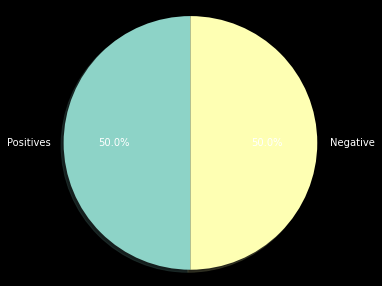

In [28]:
#visuallizing the data
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [29]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [31]:
#Example
tweet = all_positive_tweets[2277]
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

In [32]:
print(tweet)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [33]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)
print('Tokenized string:')
print(tweet_tokens)

Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [34]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print(tweets_clean)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [35]:
# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list
print(tweets_stem)

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [36]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

In [37]:
# choose tweet
tweet = all_positive_tweets[2277]
print(tweet)

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print(tweets_stem) # Print the result

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
